# GRADED CHALLENGE - 1

## Pokemon Dataset Analysis
Analisis ini bertujuan sebagai gambaran kepada user yang baru mau mengikuti dunia Pokemon agar mengetahui tentang tipe-tipe Pokemon, Atribut, Status Legenda, dll

In [1]:
#import modul pandas dan numpy dengan membuat alias

import pandas as pd
import numpy as np

Pada bagian dibawah ini akan berisi gambaran dari dataset pokemon

In [2]:
pk = pd.read_csv('Pokemon.csv') #dataset Pokemon tersimpan sebagai variabel "pk"

In [3]:
len(pk)

800

In [4]:
pk.shape

(800, 13)

In [5]:
pk.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Dari info diatas terlihat bahwa nilai pada bagian Type 2 berbeda dengan yang lain. Dalam arti lain, Type 2 mempunyai nilai Null

In [6]:
pk.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
pk.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
pk.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


### Pada bagian info diatas ada sedikit keanehan dari total pada kolom '#' dan index yang tidak sesuai.

In [9]:
pk['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

### Pada bagian diatas untuk mengetahui jumlah pokemon berdasarkan 'Type 2'

In [10]:
pk.groupby('Type 2')['Total'].mean().sort_values()

Type 2
Bug         393.333333
Poison      396.500000
Grass       408.920000
Normal      411.500000
Fairy       417.956522
Water       418.214286
Ghost       430.714286
Rock        434.642857
Ground      444.342857
Flying      452.546392
Electric    455.333333
Psychic     479.060606
Dark        484.400000
Steel       485.227273
Fire        506.250000
Ice         525.714286
Fighting    525.846154
Dragon      526.166667
Name: Total, dtype: float64

In [11]:
pk['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [12]:
pk.groupby('Generation')['Total'].mean().sort_values()

Generation
2    418.283019
1    426.813253
5    434.987879
3    436.225000
6    436.378049
4    459.016529
Name: Total, dtype: float64

-------------------------------------------------------------------------------------------

# Mengisi missing value

Setelah diketahui kalau dari kolom Type 2 mempunyai nilai Null, sebaiknya diisi dengan karakter (sesuai keinginan) sebagai salah satu proses cleaning data

In [13]:
pk_gc1 = pk.copy() #proses ini untuk menyalin dataset pk ke pk_gc1 agar data mentah bisa tersimpan sesuai data awal agar tidak berantakan apabila ada proses cleaning atau pengolahan yang salah
pk_gc1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [14]:
pk_gc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Berikut proses untuk mengisi Missing Value pada kolom Type 2

In [15]:
pk_gc1=pk_gc1.fillna('-')

In [16]:
pk_gc1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Dari informasi diatas bisa dilihat kalau nilai count dari semua kolom sudah sama. Bisa diasumsikan kalau semua baris sudah terisi.
### Untuk baris yang berisi missing value tidak dihapus karena memang ada Pokemon yang memiliki 1 Type saja

-------------------------

# Menghapus kolom

Dari informasi sebelumnya kita mengetahui bahwa total nomor dan index tidak sesuai. Agar tidak ada salah paham dalam acuan urutan, kolom '#' akan dihapus.

In [17]:
pk_gc1.drop('#',inplace=True,axis=1)

In [18]:
pk_gc1

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


# Mengganti nama kolom

Disini akan mengganti nama kolom yang mengandung 'Sp.' agar tidak disingkat supaya lebih jelas dan tidak ambigu. Contoh bisa saja user mengira 'Sp.' adalah Speed.

In [19]:
pk_gc1=pk_gc1.rename(columns=
{"Sp. Atk":"Special Attack",'Sp. Def':'Special Defense'})

In [20]:
pk_gc1

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


### Sekarang kolom Special Attack dan Defense sudah terbaca lebih jelas
-----------------------------

# Query Data

## 1. Mencari Pokemon terkuat

Jika bermain atau menonton suatu cerita multi karakter tentu kita penasaran siapa atau apa saja yang menjadi karakter terkuat dalam cerita tersebut.

Pada kolom 'Total', terdapat nilai akumulatif dari semua atribut.

In [21]:
strongpk = pk_gc1[pk_gc1['Total']>700]

In [22]:
strongpk

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary
163,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,MewtwoMega Mewtwo Y,Psychic,-,780,106,150,70,194,120,140,1,True
422,KyogrePrimal Kyogre,Water,-,770,100,150,90,180,160,90,3,True
424,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
426,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
552,Arceus,Normal,-,720,120,120,120,120,120,120,4,True


Berikut adalah 6 Pokemon tertinggi atau terkuat. MewtwoMega Mewtwo X dan Y menjadi Pokemon terkuat. Keenam Pokemon tersebut termasuk dalam kategori Legenda 

## 2. Mencari pokemon terkuat yang bukan category legendary

Sebelumnya kita sudah mengetahui Pokemon apa saja yang terkuat. Karena semua pokemon terkuat adalah Legenda, kita akan mencari Pokemon-pokemon terkuat yang bukan dari kategori Legenda

In [23]:
xpk = pk_gc1[(pk_gc1['Total']>700)&(pk_gc1['Legendary']!= True)] #Nilai Total menggunakan nilai yang sama dengan pokemon legenda

In [24]:
xpk #untuk filter total nilai diatas 700, tidak ditemukan hasil.

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary


In [25]:
xpk = pk_gc1[(pk_gc1['Total']>650)&(pk_gc1['Legendary']!= True)] #Percobaan pencarian dengan menurunkan nilai total menjadi 650

In [26]:
xpk

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary
268,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
313,Slaking,Normal,-,670,150,160,100,95,65,100,3,False
409,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False
494,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False


#### Berikut adalah 5 Pokemon terkuat secara Total Atribut yang bukan dari kategori Legenda, ternyata tidak ada Pokemon bukan legenda dari generasi 1 dan 5 yang Total atributnya lebih dari 650

## 3. Mencari Pokemon dengan Atribut Attack, Special Attack, Speed terbaik
#### Pokemon ini akan sangat efektif karena bisa menyerang duluan, dalam arti lain bisa saja mengalahkan musuh tanpa musuh tersebut sempat menyerang balik

In [27]:
attpk = pk_gc1[(pk_gc1['Attack']>150)&(pk_gc1['Special Attack']>=150)&(pk_gc1['Speed']>=150)]

In [28]:
attpk

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary
429,DeoxysAttack Forme,Psychic,-,600,50,180,20,180,20,150,3,True


#### Ternyata hanya ada 1 Pokemon dengan atribut attack terkuat.
------------

# Grouping and Aggregating

## 1. Group untuk menghitung jumlah Pokemon per tipe_1 dan per generasi

In [29]:
xx = pk_gc1.groupby(['Type 1','Generation'])['Generation'].count()

In [30]:
xx

Type 1  Generation
Bug     1             14
        2             12
        3             12
        4             10
        5             18
                      ..
Water   2             18
        3             27
        4             13
        5             18
        6              5
Name: Generation, Length: 98, dtype: int64

Data hasil grouping diatas ada 98 baris dan tidak muat untuk ditampilkan

## 2. Grouping untuk mengetahui jumlah Pokemon berdasarkan gabungan Type 1 dan Type 2

In [31]:
pk_gc1.groupby(['Type 1','Type 2'])['Name'].count()

Type 1  Type 2  
Bug     -           17
        Electric     2
        Fighting     2
        Fire         2
        Flying      14
                    ..
Water   Ice          3
        Poison       3
        Psychic      5
        Rock         4
        Steel        1
Name: Name, Length: 154, dtype: int64

## 3. Grouping untuk mengetahui jumlah Pokemon Legendary dari setiap Type 1 dan Type 2

In [32]:
aa = pk_gc1[
        (pk_gc1['Legendary']==True)
        ].groupby(['Generation', 'Type 1', 'Type 2'])['Legendary'].count()

In [33]:
aa

Generation  Type 1    Type 2  
1           Electric  Flying      1
            Fire      Flying      1
            Ice       Flying      1
            Psychic   -           2
                      Fighting    1
2           Electric  -           1
            Fire      -           1
                      Flying      1
            Psychic   Flying      1
            Water     -           1
3           Dragon    Flying      2
                      Psychic     4
            Ground    -           1
                      Fire        1
            Ice       -           1
            Psychic   -           4
            Rock      -           1
            Steel     -           1
                      Psychic     1
            Water     -           2
4           Dark      -           1
            Fire      Steel       1
            Ghost     Dragon      2
            Grass     -           1
                      Flying      1
            Normal    -           2
            Psychic   -          

## 4. Grouping untuk mengetahui rata-rata total atribut dari tiap Type Pokemon

In [34]:
pk_gc1.describe()

,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [35]:
pk_gc1.groupby(['Type 1','Type 2'])['Total'].mean().sort_values()

Type 1  Type 2  
Bug     Ghost       236.000000
        Water       269.000000
        -           289.705882
Poison  Water       320.000000
        Bug         330.000000
                       ...    
Dragon  Fire        680.000000
        Electric    680.000000
Steel   Dragon      680.000000
Dragon  Ice         686.666667
Ground  Fire        770.000000
Name: Total, Length: 154, dtype: float64

### Hasil data diatas telah berurutan dari rata-rata terkecil sampai terbesar. Cukup menarik melihat Type Ground Fire memiliki rata-rata nilai yang cukup jauh dari rata-rata kedua terbesar

# Visualizing

In [36]:
%matplotlib inline

## 1. Grafik dari grouping nomor 3

<AxesSubplot:xlabel='Type 1,Type 2'>

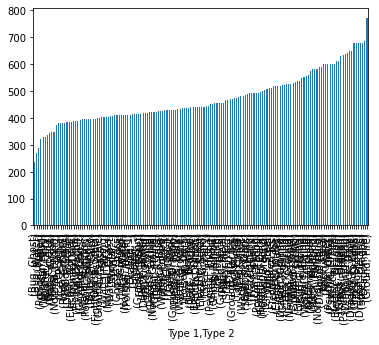

In [37]:
pk_gc1.groupby(['Type 1','Type 2'])['Total'].mean().sort_values().plot(kind='bar')

### dari grafik ini lebih terlihat perbedaan yang cukup jauh dari tipe Ground Fire sebagai Type terkuat dengan tipe lainnya.

## 2. Grafik dari perhitungan jumlah Pokemon dari tiap generasi

In [38]:
pk_gc1.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False


<AxesSubplot:>

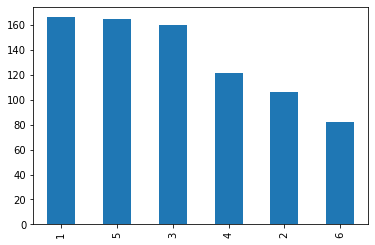

In [39]:
pk_gc1['Generation'].value_counts().plot(kind='bar')

### dari grafik ini bisa jadi acuan kolektor Pokemon untuk mencari Pokemon dari generasi 6 karena jumlahnya lebih sedikit dibanding generasi lainnya yang bisa diasumsikan Pokemon dari generasi 6 lebih langka

## 3. Grafik dari rata-rata Total atribut Pokemon per generasi

<AxesSubplot:xlabel='Generation'>

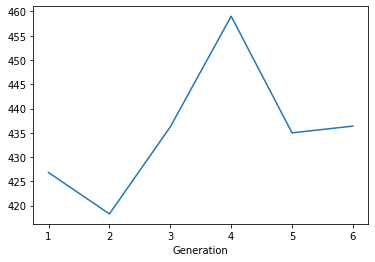

In [40]:
pk_gc1.groupby('Generation')['Total'].mean().plot()

### dari hasil plotting ini bisa membantu user untuk mempermudah memilih Pokemon yang kuat dengan mencari yang berasal dari generasi 4
-------------

# Kesimpulan

#### Dari analisa yang telah dibuat telah didapatkan informasi :

- Untuk pemula jika mencari Pokemon kuat, bisa mulai mencari Pokemon yang berasal dari generasi 4. Akan lebih baik jika Pokemon tersebut bertipe bertipe Dragon Fire / Electric / Steel Dragon / Dragon Ice / Ground Fire yang merupakan tipe dengan total atribut terkuat di dunia Pokemon

- Untuk kolektor Pokemon bisa mencari :
    - Pokemon legenda terkuat :
        - MewtwoMega Mewtwo X
        - MewtwoMega Mewtwo Y
        - KyogrePrimal Kyogre
        - GroudonPrimal Groudon (**Pokemon bertipe Ground Fire yang hanya ada 1, yang mana tipe Ground Fire adalah tipe terkuat dengan perbedaan cukup jauh dari tipe yang lain)
        - RayquazaMega Rayquaza
        - Arceus
    - Pokemon bukan legenda terkuat :
        - TyranitarMega Tyranitar
        - Slaking Normal
        - SalamenceMega Salamence
        - MetagrossMega Metagross
        - GarchompMega Garchomp

-------------------------